In [1]:
import pandas as pd
data = pd.read_csv('sentiment.csv')

In [2]:
data

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...,...,...
34788,34788,joy,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,34789,anger,A man robbed me today .,man robbed today
34790,34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU
34791,34791,sadness,"I think about you baby, and I dream about you ...",think baby dream time


In [3]:
data.Emotion.unique()

array(['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame',
       'disgust'], dtype=object)

# Removing Unnecessary Columns

In [4]:
data = data.iloc[:, 1:]

In [5]:
data.drop(columns=['Clean_Text'], inplace=True)

In [6]:
data

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...
...,...,...
34788,joy,The world didnt give it to me..so the world MO...
34789,anger,A man robbed me today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO..."
34791,sadness,"I think about you baby, and I dream about you ..."


# Performing EDA 

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

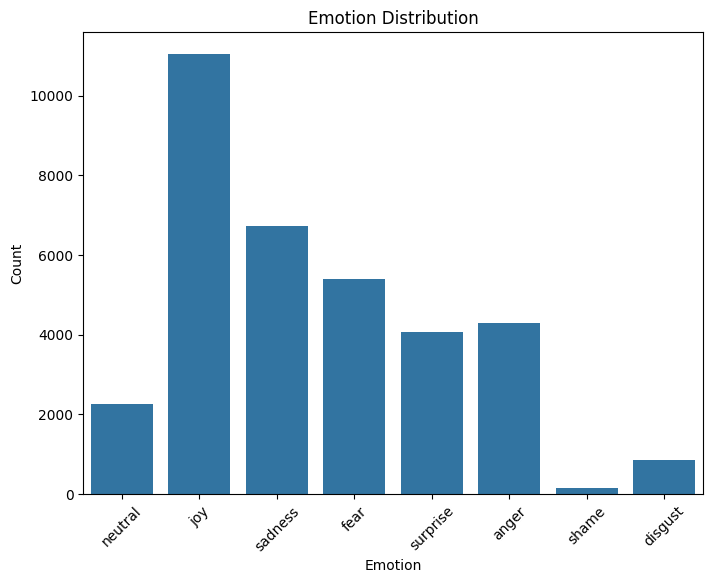

In [8]:
# Data Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Emotion')
plt.title("Emotion Distribution")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [9]:
# Text Length Statistics
data['Text_Length'] = data['Text'].apply(len)
text_length_stats = data['Text_Length'].describe()
print("\nText Length Statistics:")
print(text_length_stats)


Text Length Statistics:
count    34793.000000
mean        86.683442
std         47.451003
min          2.000000
25%         54.000000
50%         82.000000
75%        116.000000
max       1160.000000
Name: Text_Length, dtype: float64


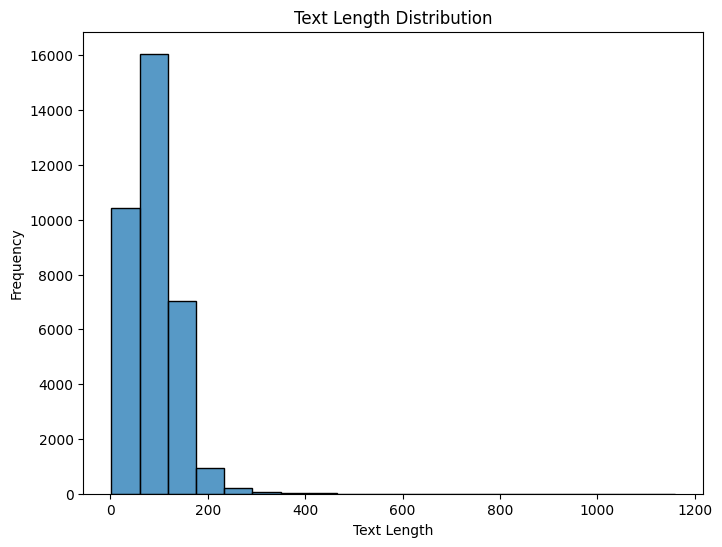

In [10]:
# Text Length Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Text_Length', bins=20)
plt.title("Text Length Distribution")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

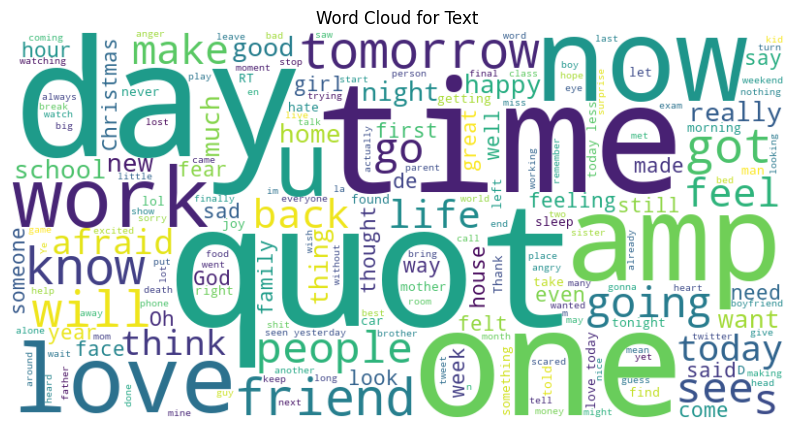

In [11]:
# Word Clouds
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['Text']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Text")
plt.axis('off')
plt.show()


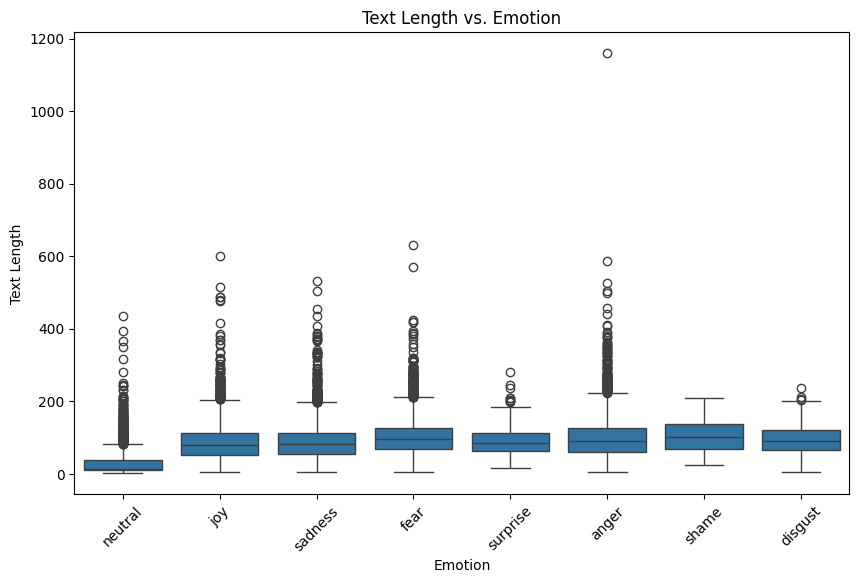

In [12]:
# Text Length vs. Emotion
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Emotion', y='Text_Length')
plt.title("Text Length vs. Emotion")
plt.xlabel("Emotion")
plt.ylabel("Text Length")
plt.xticks(rotation=45)
plt.show()

# # Mapping Emotion to text

In [13]:
# Define the mapping dictionary
mapping = {'neutral': 1, 'joy': 2, 'sadness': 3, 'fear': 4, 'surprise': 5, 'anger': 6, 'shame': 7, 'disgust': 8}

# Create a new column 'sentiment' using the mapping
data['sentiment'] = data['Emotion'].map(mapping)

In [14]:
data= data.iloc[:,1:]

# Splitting Training and testing data

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data.Text,data.sentiment, test_size = 0.01)

In [20]:
len(x_train)

34445

In [22]:
# Using count vectorizer to convert text into number vector
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
x_train_count = v.fit_transform(x_train.values)
x_test_count = v.fit_transform(x_test.values)
# x_train_count.toarray()[:3]

In [23]:
x_train_count

<34445x36863 sparse matrix of type '<class 'numpy.int64'>'
	with 466634 stored elements in Compressed Sparse Row format>

# Building Model

In [24]:
from sklearn.svm import SVC

In [25]:
svm_classifier = SVC(kernel='linear', C=1.0)

In [ ]:
svm_classifier.fit(x_train_count, y_train)

In [19]:
import pickle
import joblib

In [20]:
# pickle.dump(svm_classifier,open("model.pkl","wb"))

In [21]:
# joblib.dump(v, 'vectorizer.pkl')

['vectorizer.pkl']

In [24]:
def predict(text):
    texts = []
    texts.append(text)
    text_count = v.transform(texts)
    results = svm_classifier.predict(text_count)
    emotions = ['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']
    print(emotions[results[0]-1])

In [25]:
predict("I just received a promotion at work!")

ValueError: X has 1955 features, but SVC is expecting 36831 features as input.

In [45]:
predict("I lost my beloved pet dog yesterday")

sadness


In [46]:
predict("The horror movie gave me nightmares.")

fear


In [49]:
predict("I didn't expect this!")

surprise


In [50]:
predict("His rude behavior really got on my nerves")

anger


In [51]:
predict("I feel ashamed of my behavior at the party last night")

shame


In [53]:
predict("The spoiled milk in the fridge made me feel disgusted.")

sadness


In [18]:
predict("The sight and smell of the garbage dump was truly disgusting")

ValueError: X has 1966 features, but SVC is expecting 36765 features as input.

In [22]:
x_test_count = v.fit_transform(x_test.values)

In [ ]:
# Making predictions on the test data
y_pred = svm_classifier.predict(x_train_count)

In [18]:
print("Number of features in x_train:", x_train_count.shape[1])
print("Number of features in x_test:", x_test_count.shape[1])


Number of features in x_train: 36810
Number of features in x_test: 1931
